Import relevant libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Lin Reg
from sklearn.linear_model import LinearRegression
# Tree
from sklearn.tree import DecisionTreeClassifier
# Support Vector Machine
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Log Reg
from sklearn.linear_model import LogisticRegression
# GridSearchCv for optimization
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:>

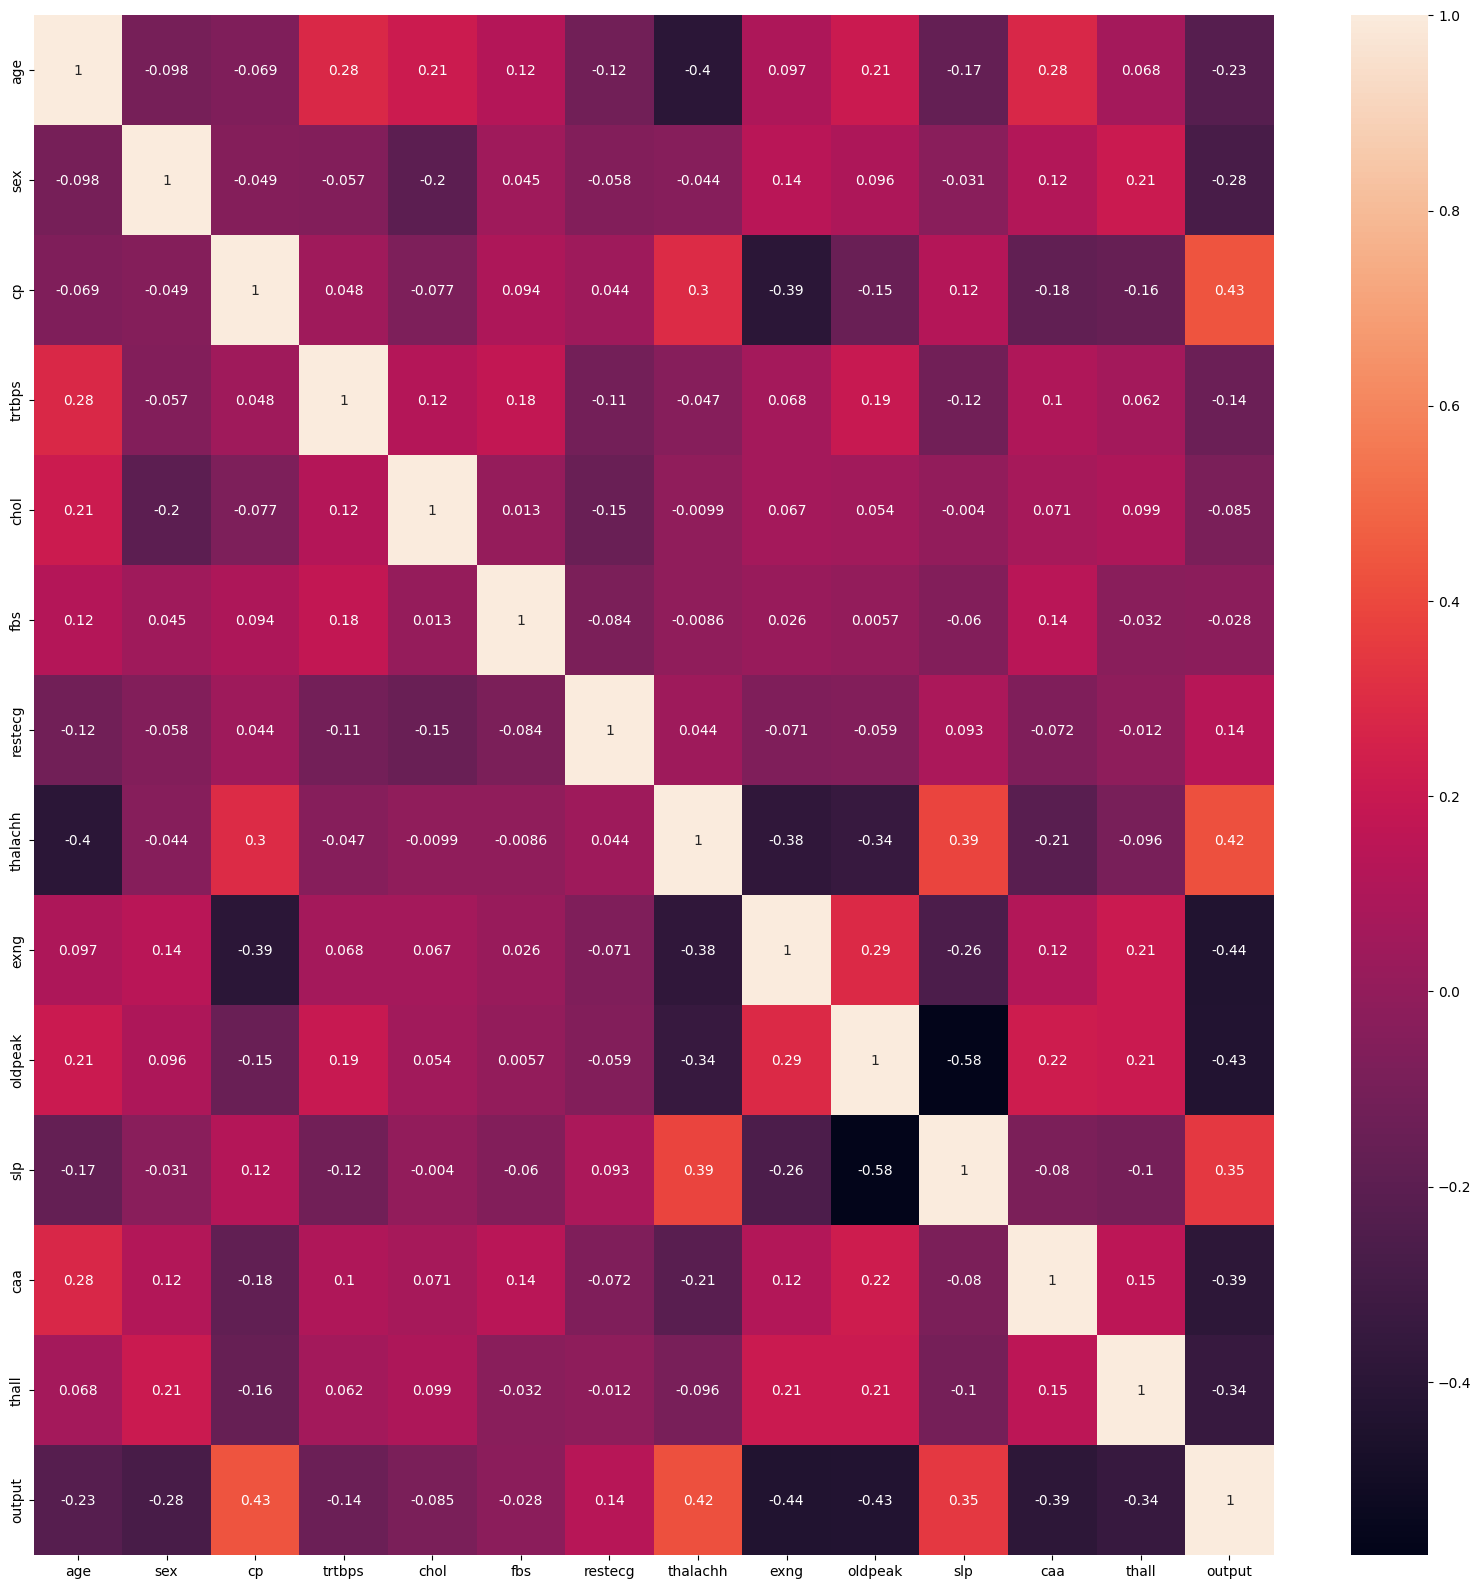

In [9]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

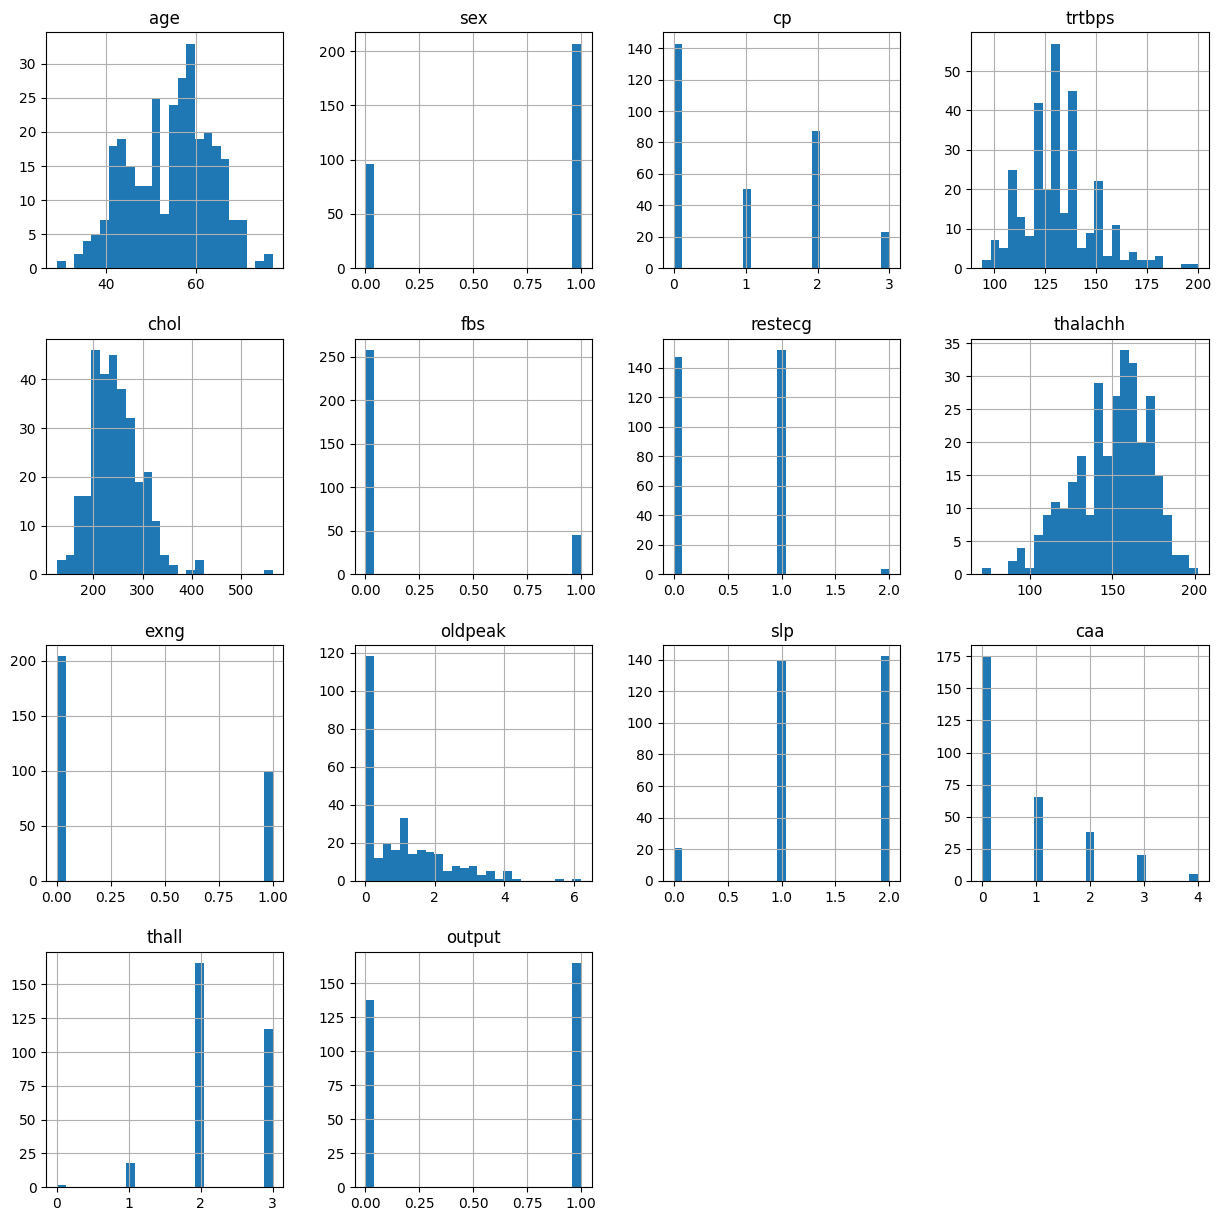

In [10]:
df.hist(bins = 25, figsize = (15,15))


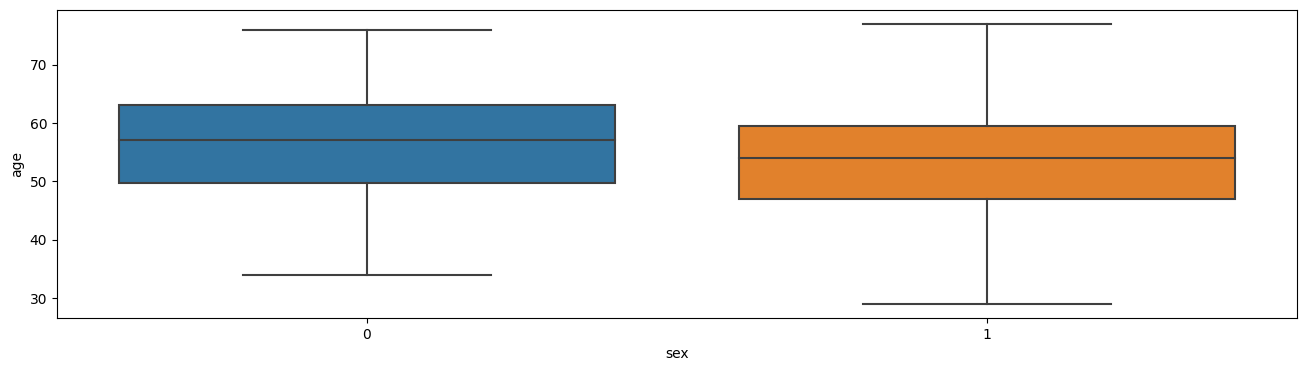

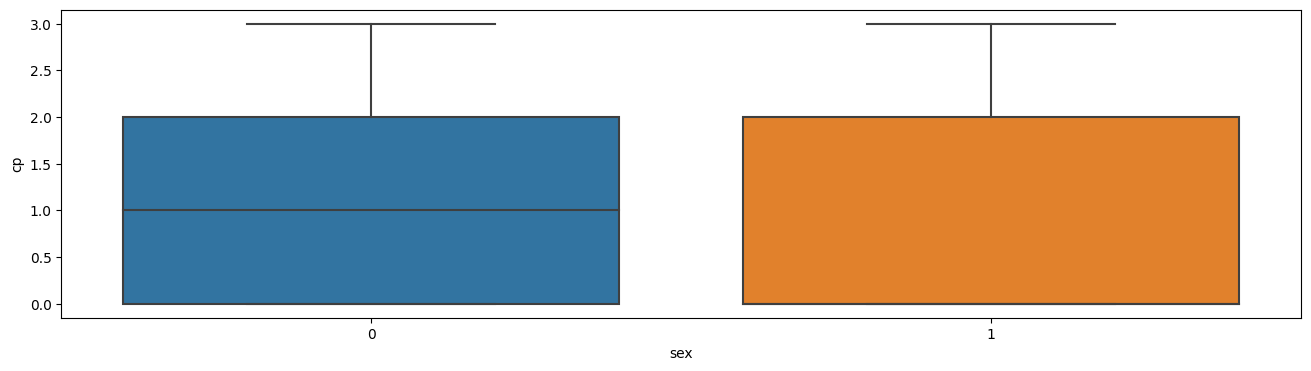

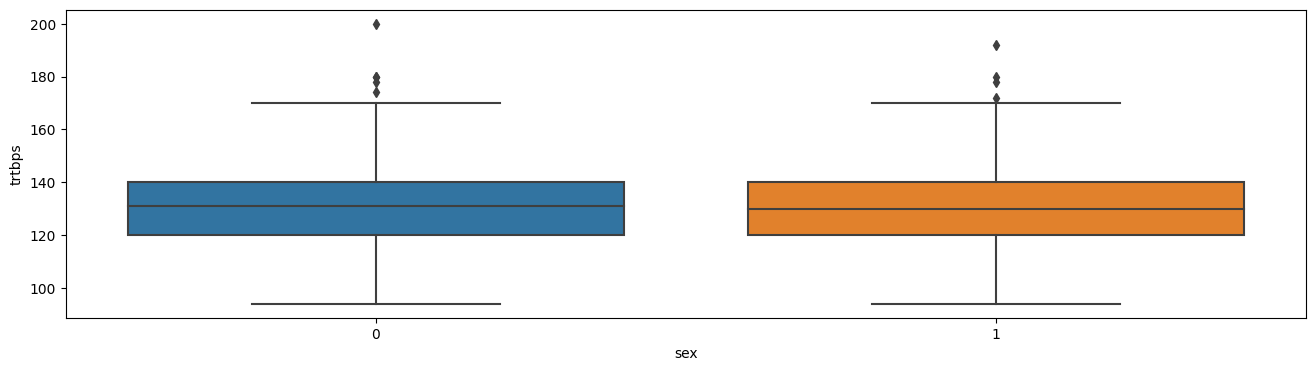

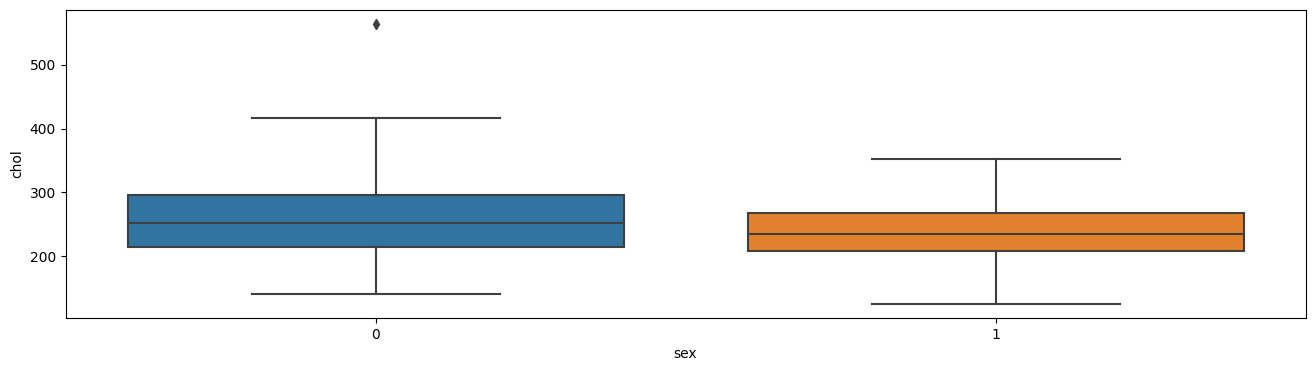

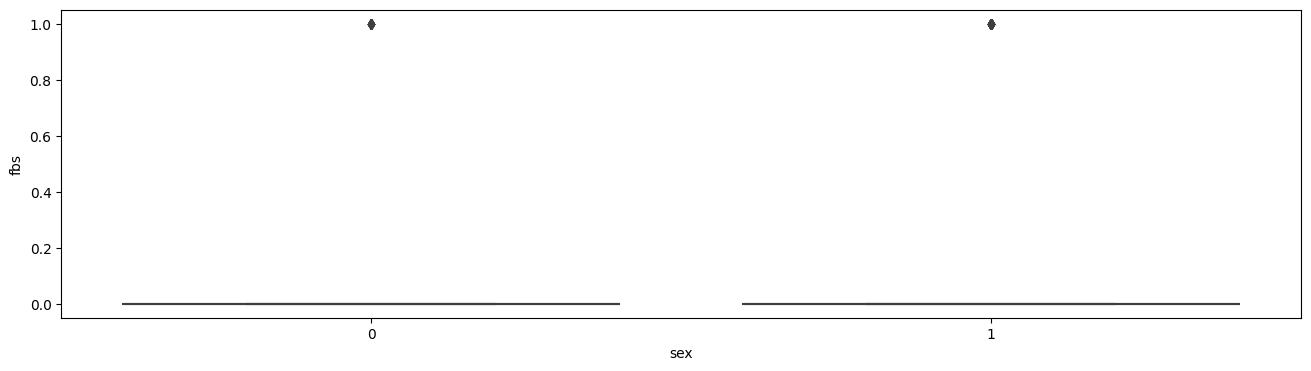

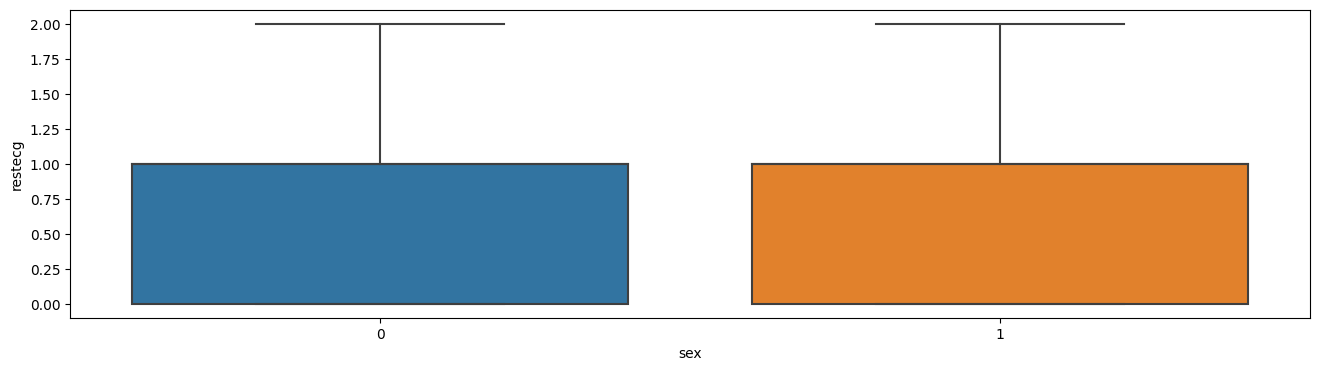

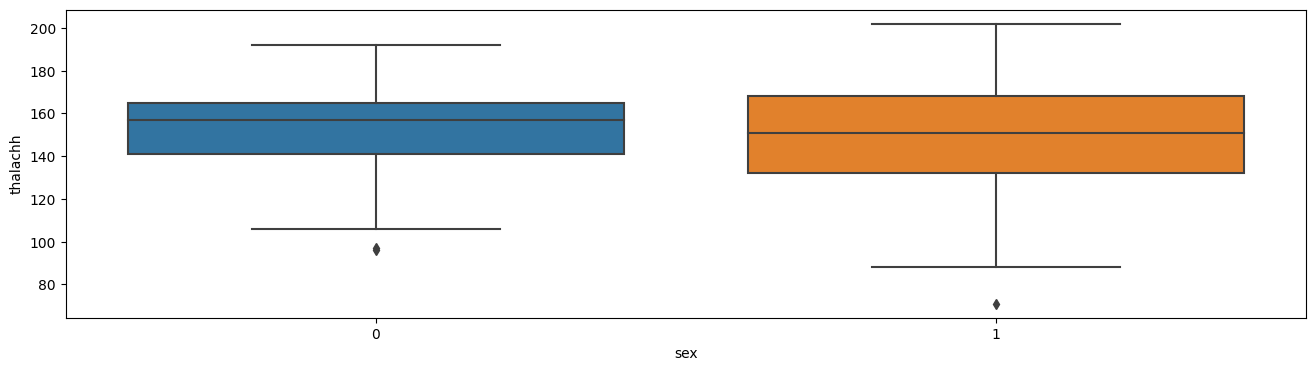

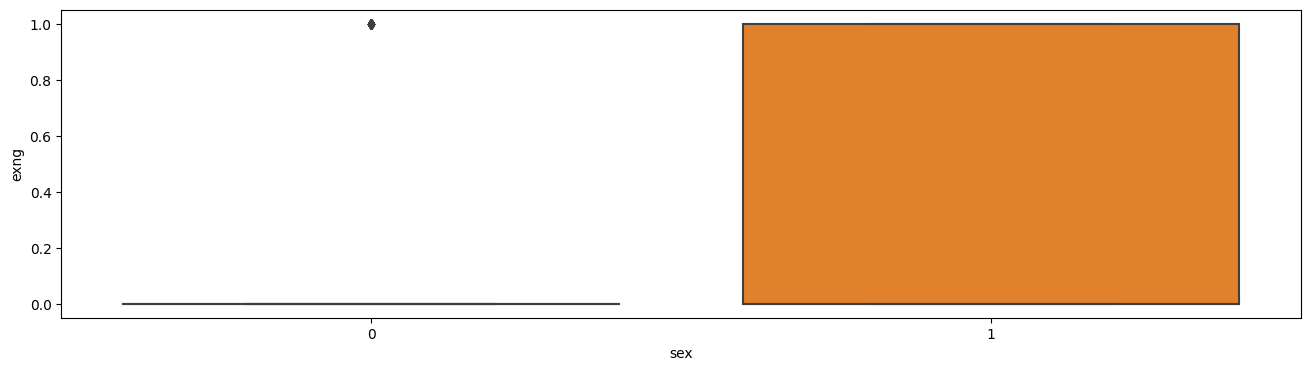

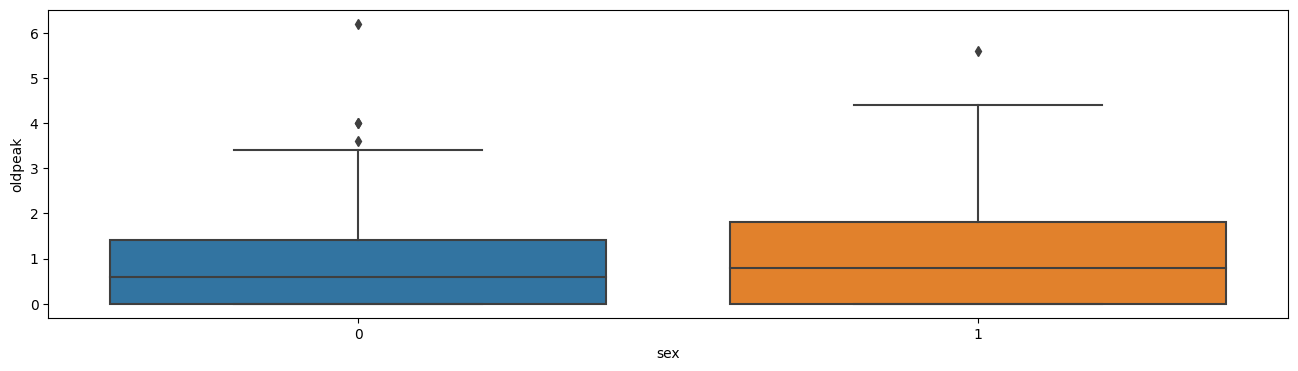

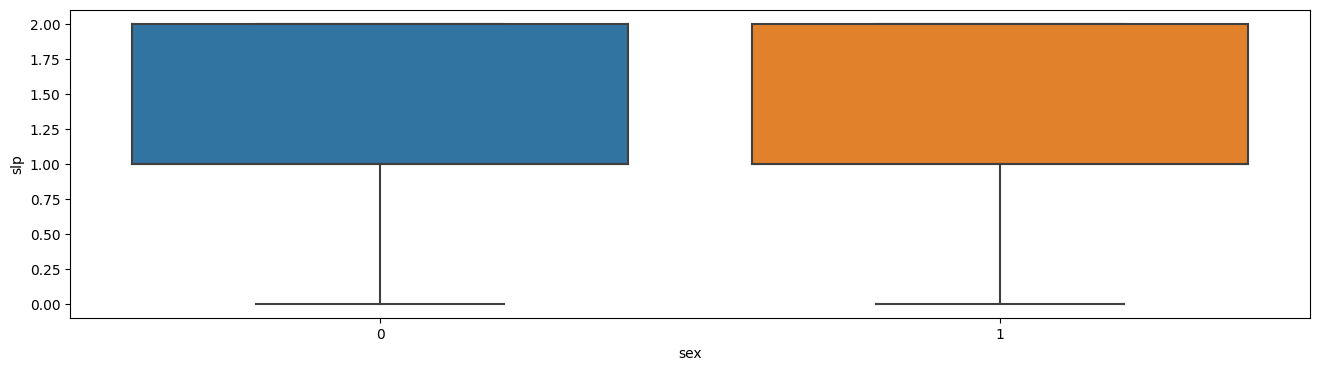

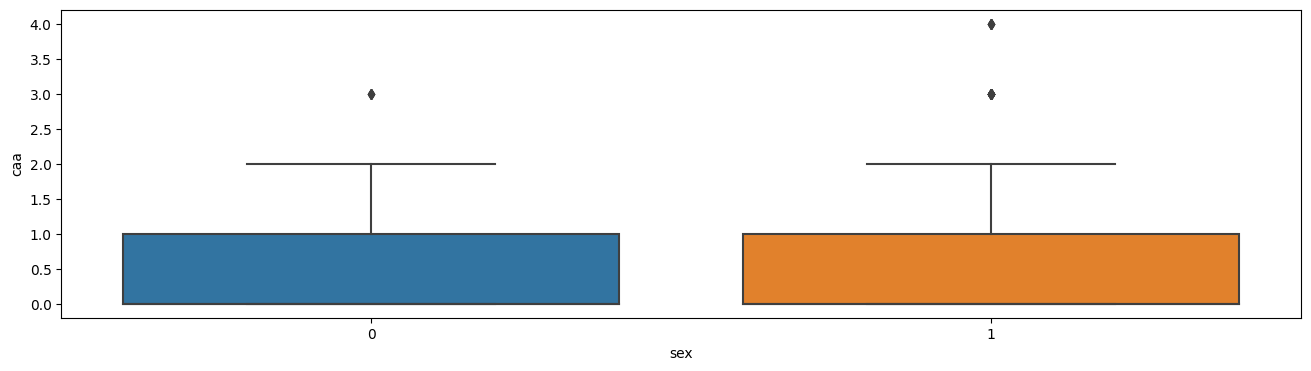

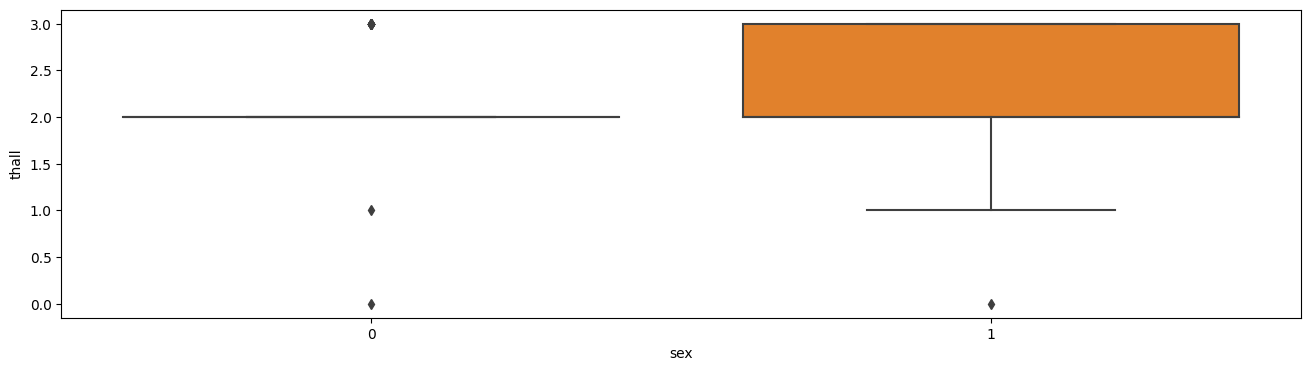

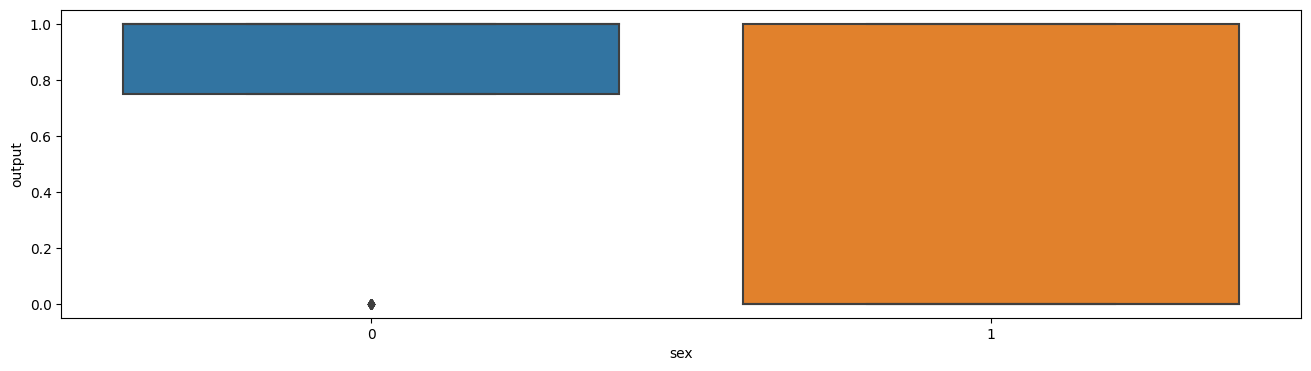

In [11]:
for column in df:
    if column != 'sex':
        plt.figure(figsize=(16, 4))
        sns.boxplot(data = df, x = 'sex', y = column)

Data Filtering and Cleaning

In [12]:
X = df.drop(['output'], axis = 1)
Y = df['output']
print(X.shape, Y.shape)

(303, 13) (303,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print("Train: ", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape, Y_test.shape)

Train:  (227, 13) (227,)
Test:  (76, 13) (76,)


Data Modeling

In [24]:
# Support Vector Machine

# Kernel Optimization

# Linear
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)
svml = (svm.score(X_test, Y_test))

# Poly
svm = SVC(kernel = 'poly', degree=3)
svm.fit(X_train, Y_train)
svmp = (svm.score(X_test, Y_test))

# RBF
svm = SVC(kernel = 'rbf')
svm.fit(X_train, Y_train)
svmr = (svm.score(X_test, Y_test))

# Sigmoid
svm = SVC(kernel = 'sigmoid')
svm.fit(X_train, Y_train)
svms = (svm.score(X_test, Y_test))


In [25]:
d = {'Kernel': ['Lin', 'Pol', 'RBF', 'Sig'], 'Accuracy': [svml, svmp, svmr, svms]}
kernel = pd.DataFrame(data = d)
kernel

,Kernel,Accuracy
0,Lin,0.789474
1,Pol,0.552632
2,RBF,0.565789
3,Sig,0.447368


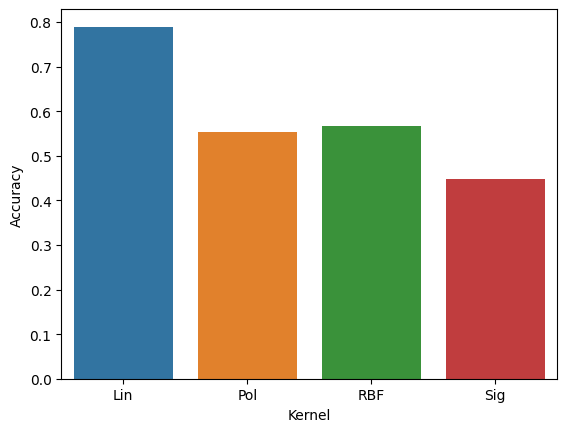

In [26]:
sns.barplot(data = kernel, x = 'Kernel', y = 'Accuracy')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

In [36]:
# Decision Tree
params = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
Tree = DecisionTreeClassifier()
Tree_cv = GridSearchCV(Tree, params, cv = 3)
Tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [37]:
print("Best params",Tree_cv.best_params_)
print("Accuracy :",Tree_cv.best_score_)

Best params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy : 0.8151461988304094


In [40]:
# Using Best Parameter
Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 10, splitter = 'best')
Tree.fit(X_train, Y_train)
acc = Tree.score(X_test, Y_test)
print(acc)


0.8157894736842105


In [46]:
# Log Regression

# C = 0.01
LogR = LogisticRegression(C = 0.01, max_iter=1000)
LogR.fit(X_train,Y_train)
LogR1 = LogR.score(X_test, Y_test)

# C = 0.1
LogR = LogisticRegression(C = 0.1, max_iter=1000)
LogR.fit(X_train,Y_train)
LogR2 = LogR.score(X_test, Y_test)

# C = 1
LogR = LogisticRegression(C = 1, max_iter=1000)
LogR.fit(X_train,Y_train)
LogR3 = LogR.score(X_test, Y_test)

# C = 10
LogR = LogisticRegression(C = 10, max_iter=1000)
LogR.fit(X_train,Y_train)
LogR4 = LogR.score(X_test, Y_test)

In [47]:
d = {'C': ['0.01', '0.1', '1', '10'], 'Accuracy': [LogR1, LogR2, LogR3, LogR4]}
C = pd.DataFrame(data = d)
C

,C,Accuracy
0,0.01,0.736842
1,0.1,0.815789
2,1,0.776316
3,10,0.776316


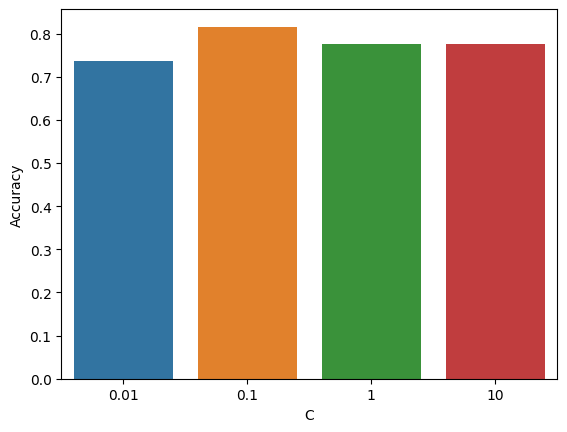

In [49]:
sns.barplot(data = C, x = 'C', y = 'Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [69]:
# KNN
K = 10
Optimize = []
N = []
for i in range(1, K):
    N.append(i)
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, Y_train)
    Optimize.append(KNN.score(X_test, Y_test))

Optimize = np.array(Optimize)
N = np.array(N)


In [70]:
d = {'K': N, 'Accuracy': Optimize}
C = pd.DataFrame(data = d)
C

,K,Accuracy
0,1,0.539474
1,2,0.578947
2,3,0.592105
3,4,0.605263
4,5,0.618421
5,6,0.644737
6,7,0.578947
7,8,0.578947
8,9,0.578947


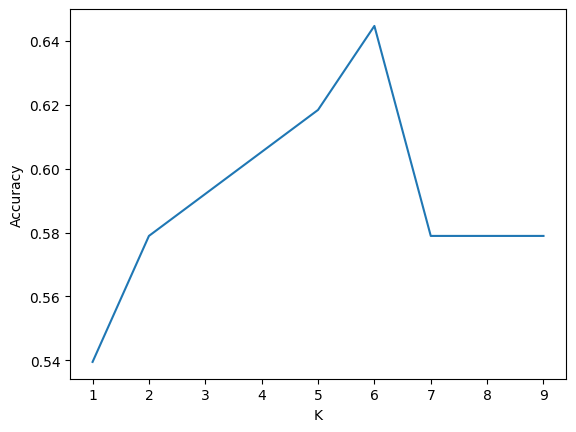

In [71]:
sns.lineplot(data = C, x = 'K', y = 'Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [72]:
# Optimal K
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train, Y_train)
acc = KNN.score(X_test, Y_test)
print(acc)

0.6447368421052632


In [ ]:
# Nueral Network